In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("uploads\TSLA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

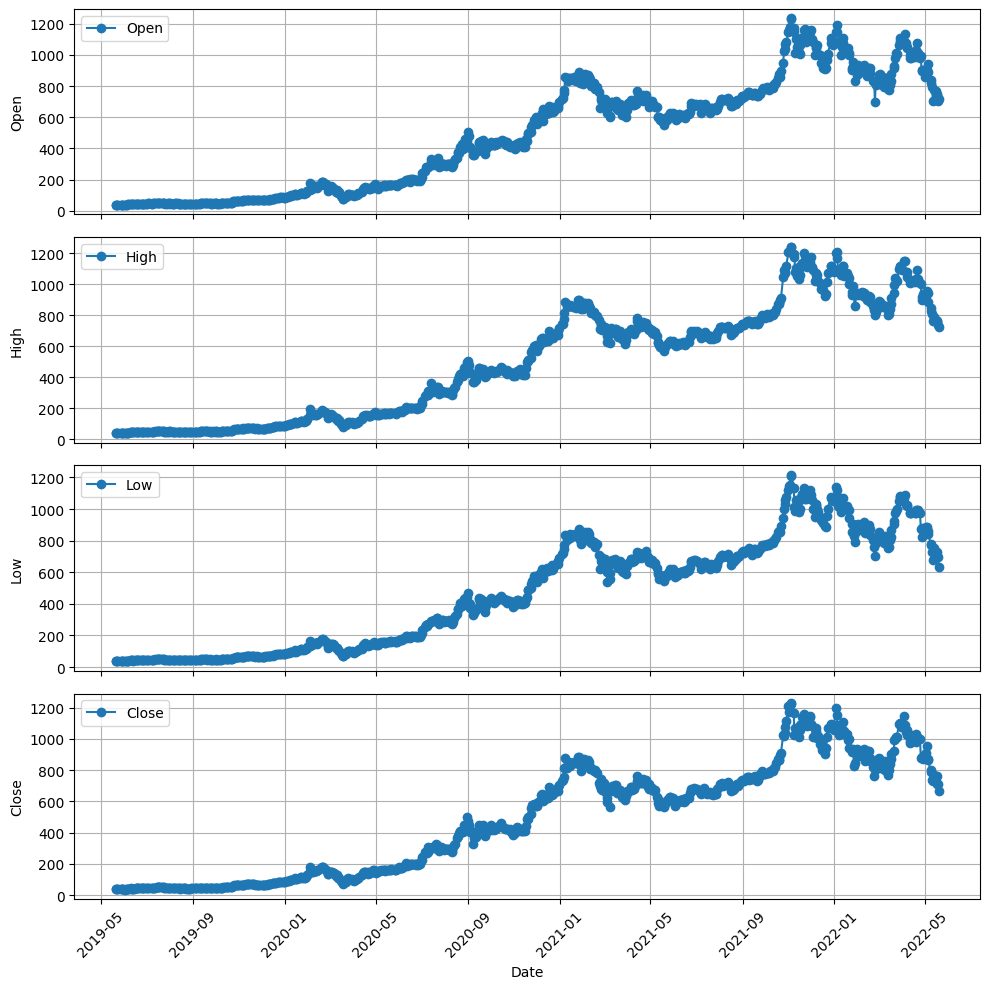

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df['Date'], df['Open'], label='Open', marker='o')
axs[0].set_ylabel('Open')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(df['Date'], df['High'], label='High', marker='o')
axs[1].set_ylabel('High')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(df['Date'], df['Low'], label='Low', marker='o')
axs[2].set_ylabel('Low')
axs[2].grid(True)
axs[2].legend()

axs[3].plot(df['Date'], df['Close'], label='Close', marker='o')
axs[3].set_ylabel('Close')
axs[3].grid(True)
axs[3].legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]

In [11]:
# Splitting data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

### Isolation Forest

In [12]:
model = IsolationForest(random_state=42)
model.fit(X_train)

IsolationForest(random_state=42)

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [14]:
train_accuracy = (train_pred == 1).sum() / train_pred.shape[0]
test_accuracy = (test_pred == 1).sum() / test_pred.shape[0]

In [15]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.6996699669966997
Test Accuracy: 0.6710526315789473


### One Class SVM

In [16]:
model = OneClassSVM(nu=0.1)  # Adjust nu parameter as needed
model.fit(X_train)

OneClassSVM(nu=0.1)

In [17]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [18]:
train_accuracy = (train_pred == 1).sum() / train_pred.shape[0]
test_accuracy = (test_pred == 1).sum() / test_pred.shape[0]

In [19]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8960396039603961
Test Accuracy: 0.9078947368421053


### K-Means

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [23]:
distances = kmeans.transform(X)
avg_distances = np.mean(distances, axis=1)

In [24]:
threshold = np.percentile(avg_distances, 95)

In [25]:
anomalies = avg_distances > threshold

In [26]:
anomaly_rate = np.mean(anomalies)

In [28]:
true_labels = np.zeros(len(anomalies))

In [29]:
accuracy = np.mean(anomalies == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9498680738786279


### Local Outlier Factor

In [30]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
lof.fit(X)

LocalOutlierFactor(contamination=0.1)

In [31]:
anomaly_scores = lof.negative_outlier_factor_

In [32]:
threshold = np.percentile(anomaly_scores, 10)  # You can adjust the percentile
anomalies = anomaly_scores < threshold

In [33]:
true_labels = np.zeros(len(anomalies))  # Assume all instances are normal
accuracy = np.mean(anomalies == true_labels)

print("Accuracy:", accuracy)

Accuracy: 0.899736147757256


### Guassian Hidden Markov Model

In [36]:
n_components = 3  # Number of hidden states
model = GaussianHMM(n_components=n_components)
model.fit(X)

Model is not converging.  Current: -26106.36355345308 is not greater than -26106.240416444805. Delta is -0.12313700827508


GaussianHMM(n_components=3)

In [37]:
log_prob = model.score(X)

In [38]:
threshold = np.percentile(log_prob, 10)

In [39]:
anomalies = log_prob < threshold

In [45]:
true_labels = np.zeros_like(anomalies)  # Initially assume all instances are normal
true_labels[anomalies] = -1  # Mark anomalies as 1

In [46]:
accuracy = np.mean(anomalies == true_labels)

print("Accuracy:", accuracy)

Accuracy: 1.0
